In [130]:
import pandas as pd

In [131]:
# %load matplot.py
# %%
import matplotlib.pyplot as plt
plt.rc('font', family = 'gulim')
plt.rc('axes', unicode_minus=False)




In [151]:
# 데이터 전처리된 csv 파일 read
df = pd.read_csv('./data/total_df.csv')
pd.set_option('display.float_format', '{:,.2f}'.format) # 종가(KRW) 컬럼이 e로 나오는 것을 식별가능한 숫자로 변경
del df['Unnamed: 0']
print(df.head())
print(df.tail())

     종류       날짜     연   월   종가(USD)       종가(KRW)    원달러환율           거래량
0  비트코인  2022-12  2022  12 16,868.90 21,963,645.18 1,302.02  5,640,000.00
1  비트코인  2022-11  2022  11 17,163.90 23,413,275.99 1,364.10 10,300,000.00
2  비트코인  2022-10  2022  10 20,496.30 29,241,251.36 1,426.66  8,290,000.00
3  비트코인   2022-9  2022   9 19,423.00 27,028,852.57 1,391.59 10,910,000.00
4  비트코인   2022-8  2022   8 20,043.90 26,426,679.52 1,318.44  6,550,000.00
    종류      날짜     연  월  종가(USD)   종가(KRW)    원달러환율  거래량
78  루나  2021-7  2021  7    10.72 12,268.38 1,143.98 0.00
79  루나  2021-6  2021  6     6.56  7,353.04 1,121.30 0.00
80  루나  2021-5  2021  5     6.55  7,359.62 1,123.28 0.00
81  루나  2021-4  2021  4    16.69 18,681.11 1,119.40 0.00
82  루나  2021-3  2021  3    18.68 21,131.07 1,131.02 0.00


In [169]:
# 날짜 전처리
df['연'] = df['연'].map(str)
df['월'] = df['월'].map(str)

for i in range(len(df['날짜'])):
    if len(df['월'][i]) == 1:
        df['월'][i] = '0' + df['월'][i]
    df['날짜'][i] = df['연'][i] +'.'+ df['월'][i]

C:\Users\Jasper\AppData\Local\Temp\ipykernel_39336\2927762737.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['날짜'][i] = df['연'][i] +'.'+ df['월'][i]


In [171]:
# 데이터 프레임 인덱싱 작업
df = df.set_index('종류')

### matplotlib 활용한 도표 데이터 생성

In [201]:
# 비트코인 가격 df 생성
df_bit_price = df.loc[['비트코인'], ['날짜','종가(KRW)']]
df_bit_price = df_bit_price.set_index('날짜')
df_bit_price = df_bit_price.sort_index()

C:\Users\Jasper\AppData\Local\Temp\ipykernel_39336\1246223027.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


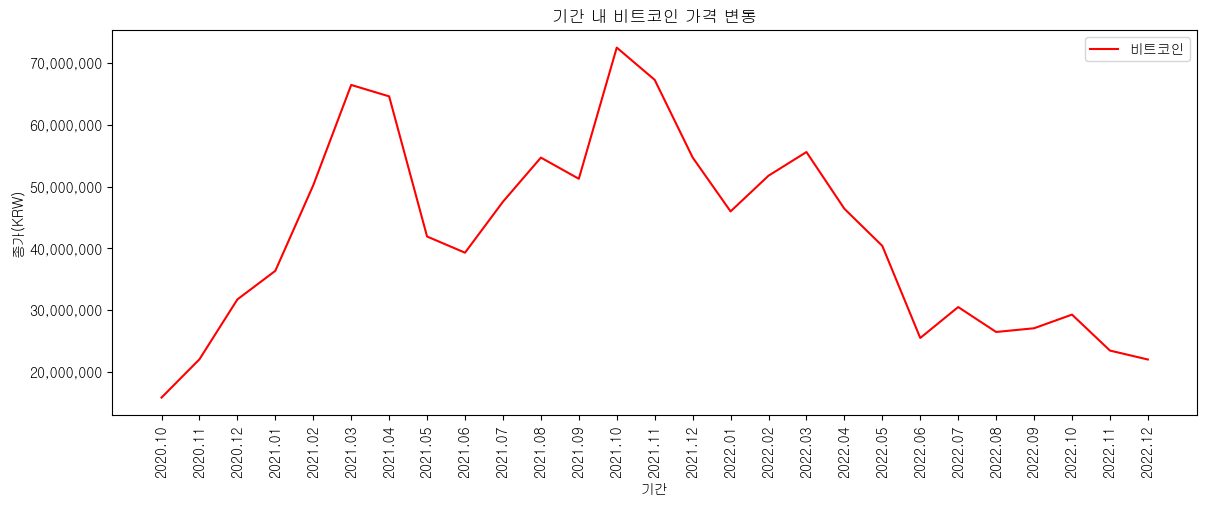

In [202]:
# 기간 내 비트코인 가격 변동
plt.figure(figsize=(14,5))
plt.plot(df_bit_price.index, df_bit_price.values, 'r')
plt.title('기간 내 비트코인 가격 변동')
plt.xlabel('기간')
plt.ylabel('종가(KRW)')

# y축 지수 표현(e) 없애기
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

# x축 숨기기
# plt.gca().axes.xaxis.set_visible(False)
plt.xticks(rotation='vertical')

plt.legend(labels=['비트코인'])
plt.show()

In [203]:
# 이더리움 가격 df 생성
df_eth_price = df.loc[['이더리움'], ['날짜','종가(KRW)']]
df_eth_price = df_eth_price.set_index('날짜')
df_eth_price = df_eth_price.sort_index()

C:\Users\Jasper\AppData\Local\Temp\ipykernel_39336\2442933539.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


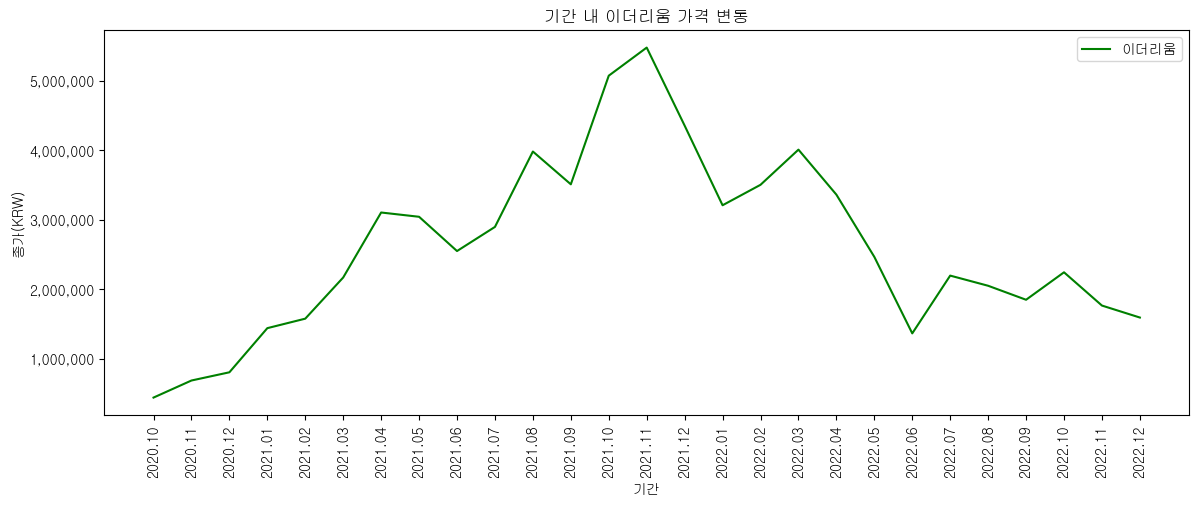

In [204]:
# 기간 내 이더리움 가격 변동
plt.figure(figsize=(14,5))
plt.plot(df_eth_price.index, df_eth_price.values,'g')
plt.title('기간 내 이더리움 가격 변동')
plt.xlabel('기간')
plt.ylabel('종가(KRW)')

# y축 지수 표현(e) 없애기
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

# x축 숨기기
# plt.gca().axes.xaxis.set_visible(False)
plt.xticks(rotation='vertical')

plt.legend(labels=['이더리움'])
plt.show()

In [205]:
# 위믹스 가격 df 생성
df_wemix_price = df.loc[['위믹스'], ['날짜','종가(KRW)']]
df_wemix_price = df_wemix_price.set_index('날짜')
df_wemix_price = df_wemix_price.sort_index()

C:\Users\Jasper\AppData\Local\Temp\ipykernel_39336\3191792983.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


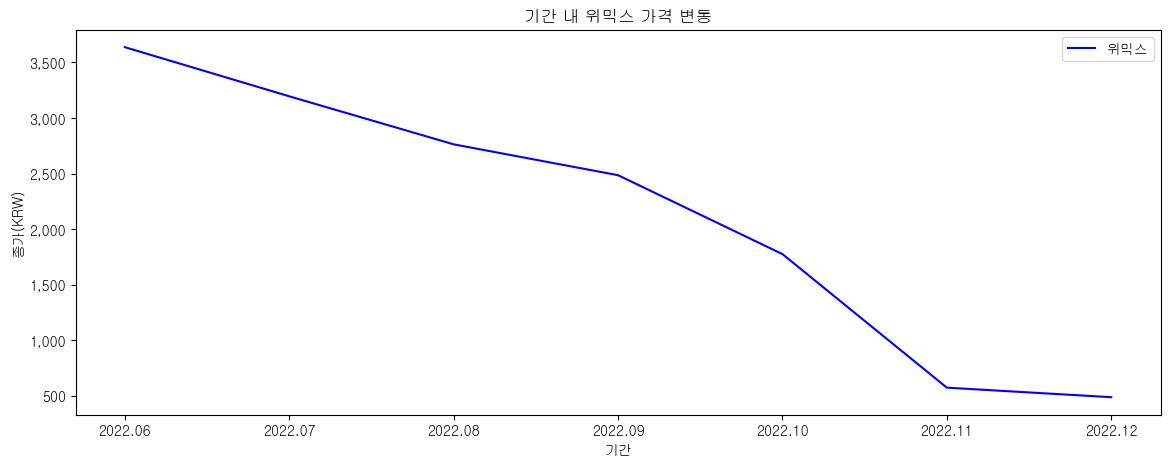

In [206]:
# 기간 내 위믹스 가격 변동
plt.figure(figsize=(14,5))
plt.plot(df_wemix_price.index, df_wemix_price.values,'b')
plt.title('기간 내 위믹스 가격 변동')
plt.xlabel('기간')
plt.ylabel('종가(KRW)')

# y축 지수 표현(e) 없애기
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

# x축 숨기기
# plt.gca().axes.xaxis.set_visible(False)
# plt.xticks(rotation='vertical')

plt.legend(labels=['위믹스'])
plt.show()

In [207]:
# 루나 df 생성
df_luna_price = df.loc[['루나'], ['날짜','종가(KRW)']]
df_luna_price = df_luna_price.set_index('날짜')
df_luna_price = df_luna_price.sort_index()

C:\Users\Jasper\AppData\Local\Temp\ipykernel_39336\297281140.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


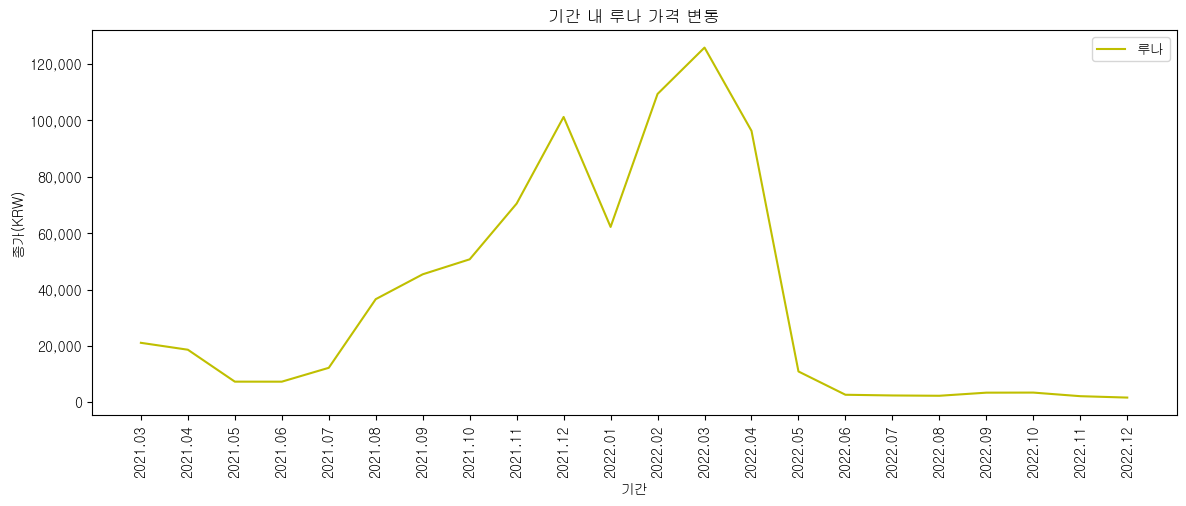

In [208]:
# 기간 내 루나 가격 변동
plt.figure(figsize=(14,5))
plt.plot(df_luna_price.index, df_luna_price.values,'y')
plt.title('기간 내 루나 가격 변동')
plt.xlabel('기간')
plt.ylabel('종가(KRW)')

# y축 지수 표현(e) 없애기
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

# x축 숨기기
# plt.gca().axes.xaxis.set_visible(False)
plt.xticks(rotation='vertical')

plt.legend(labels=['루나'])
plt.show()

In [190]:
# 환율 df 생성
ex_rate = pd.read_excel('./data/MonAvgStdExRate.xlsx')

In [191]:
ex_rate.head()

,날짜,통화명,월평균 매매기준율
0,2020.10,미국 달러 (USD),"1,144.68"
1,2020.11,미국 달러 (USD),"1,116.76"
2,2020.12,미국 달러 (USD),"1,095.13"
3,2021.01,미국 달러 (USD),"1,097.49"
4,2021.02,미국 달러 (USD),"1,111.72"


In [192]:
df_rate = ex_rate.loc[:, ['날짜','월평균 매매기준율']]
df_rate = df_rate.set_index('날짜')

C:\Users\Jasper\AppData\Local\Temp\ipykernel_39336\2650568356.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


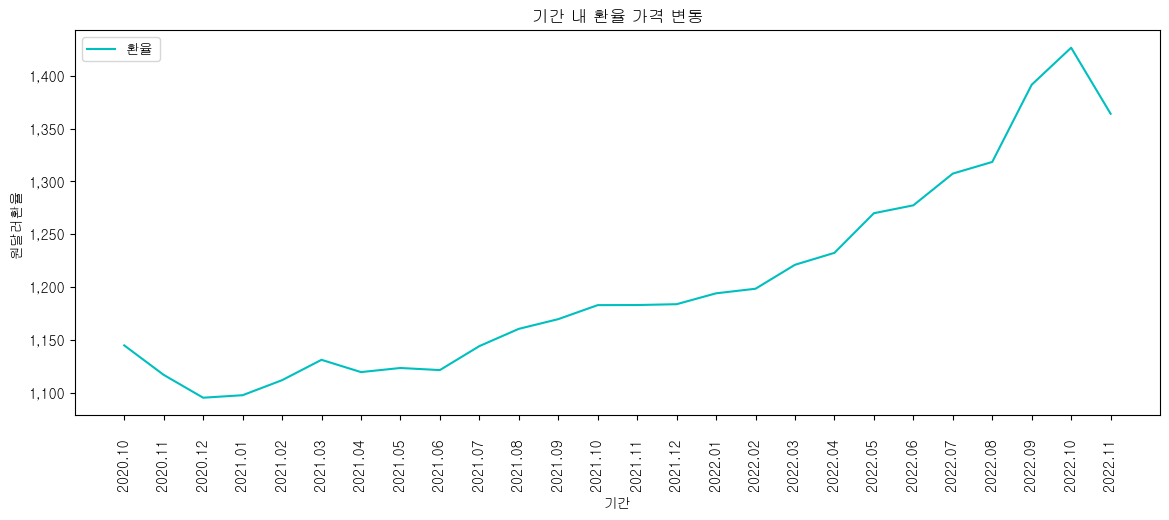

In [199]:
# 기간 내 환율 가격 변동
plt.figure(figsize=(14,5))
plt.plot(df_rate.index, df_rate.values,'c')
plt.title('기간 내 환율 가격 변동')
plt.xlabel('기간')
plt.ylabel('원달러환율')

# y축 지수 표현(e) 없애기
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

# x축 숨기기
# plt.gca().axes.xaxis.set_visible(False)
plt.xticks(rotation='vertical')

plt.legend(labels=['환율'])
plt.show()

In [ ]:
# 2022-12-27(오후) 할것
# 1. 각 코인별 거래량 그래프
# 2. 코인별 가격 변동량 및 거래량 간의 상관관계 그래프
# 3. 비트코인-이더리움, 비트코인-위믹스, 비트코인-루나 간의 상관관계 그래프
# 4. 환율-비트코인, 환율-이더리움, 환율-위믹스, 환율-루나 간의 상관관계 그래프

In [212]:
# 코인별 거래량 df 생성
df_bit_volume = df.loc[['비트코인'], ['날짜','거래량']]
df_eth_volume = df.loc[['이더리움'], ['날짜','거래량']]
df_wemix_volume = df.loc[['위믹스'], ['날짜','거래량']]
df_luna_volume = df.loc[['루나'], ['날짜','거래량']]

# 날짜 인덱싱
df_bit_volume = df_bit_volume.set_index('날짜')
df_bit_volume = df_bit_volume.sort_index()
df_eth_volume = df_eth_volume.set_index('날짜')
df_eth_volume = df_eth_volume.sort_index()
df_wemix_volume = df_wemix_volume.set_index('날짜')
df_wemix_volume = df_wemix_volume.sort_index()
df_luna_volume = df_luna_volume.set_index('날짜')
df_luna_volume = df_luna_volume.sort_index()

In [261]:
type(list(df_bit_volume.index))
type(list(df_bit_volume.values))

list

C:\Users\Jasper\AppData\Local\Temp\ipykernel_39336\744581583.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


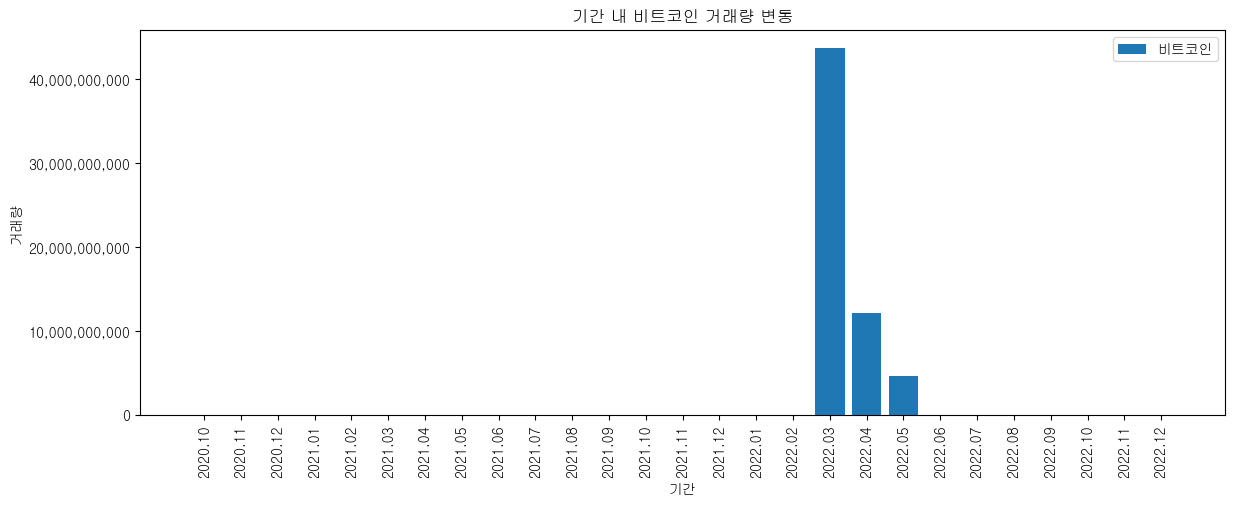

In [262]:
# 기간 내 비트코인 거래량 변동
plt.figure(figsize=(14,5))
xs = df_bit_volume.index.to_list()
ys = df_bit_volume['거래량'].to_list()
plt.bar(xs, ys)
plt.title('기간 내 비트코인 거래량 변동')
plt.xlabel('기간')
plt.ylabel('거래량')

# y축 지수 표현(e) 없애기
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

plt.xticks(rotation='vertical')

plt.legend(labels=['비트코인'])
plt.show()

C:\Users\Jasper\AppData\Local\Temp\ipykernel_39336\827507839.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


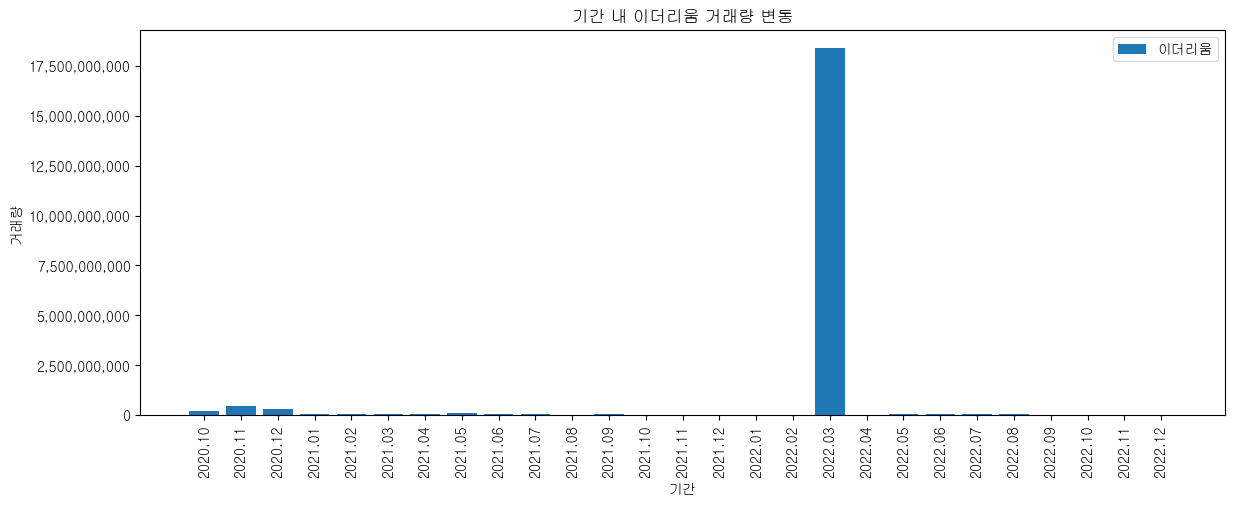

In [263]:
# 기간 내 이더리움 거래량 변동
plt.figure(figsize=(14,5))
xs = df_eth_volume.index.to_list()
ys = df_eth_volume['거래량'].to_list()
plt.bar(xs, ys)
plt.title('기간 내 이더리움 거래량 변동')
plt.xlabel('기간')
plt.ylabel('거래량')

# y축 지수 표현(e) 없애기
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

plt.xticks(rotation='vertical')

plt.legend(labels=['이더리움'])
plt.show()

C:\Users\Jasper\AppData\Local\Temp\ipykernel_39336\4079716096.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


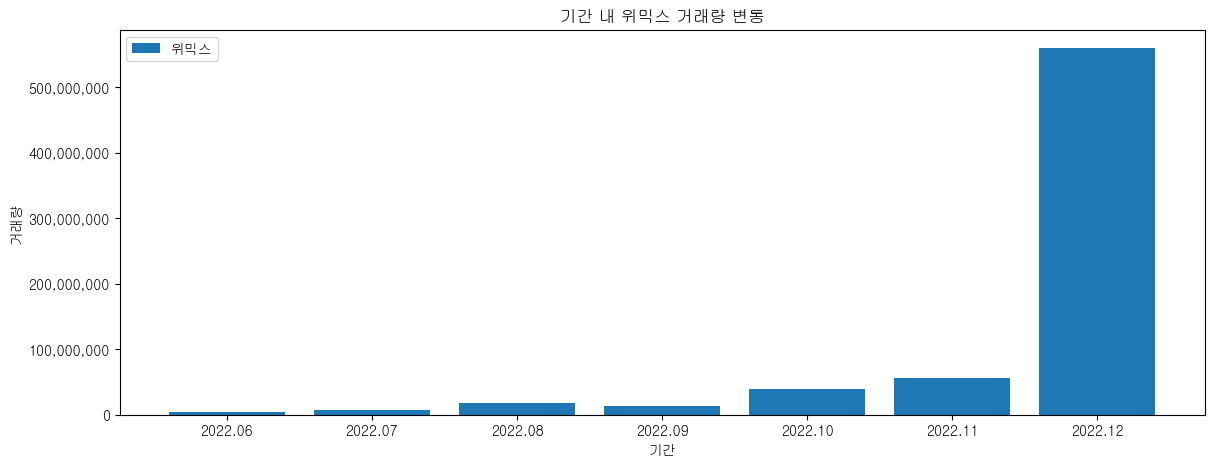

In [264]:
# 기간 내 위믹스 거래량 변동
plt.figure(figsize=(14,5))
xs = df_wemix_volume.index.to_list()
ys = df_wemix_volume['거래량'].to_list()
plt.bar(xs, ys)
plt.title('기간 내 위믹스 거래량 변동')
plt.xlabel('기간')
plt.ylabel('거래량')

# y축 지수 표현(e) 없애기
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

# plt.xticks(rotation='vertical')

plt.legend(labels=['위믹스'])
plt.show()

C:\Users\Jasper\AppData\Local\Temp\ipykernel_39336\461024218.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


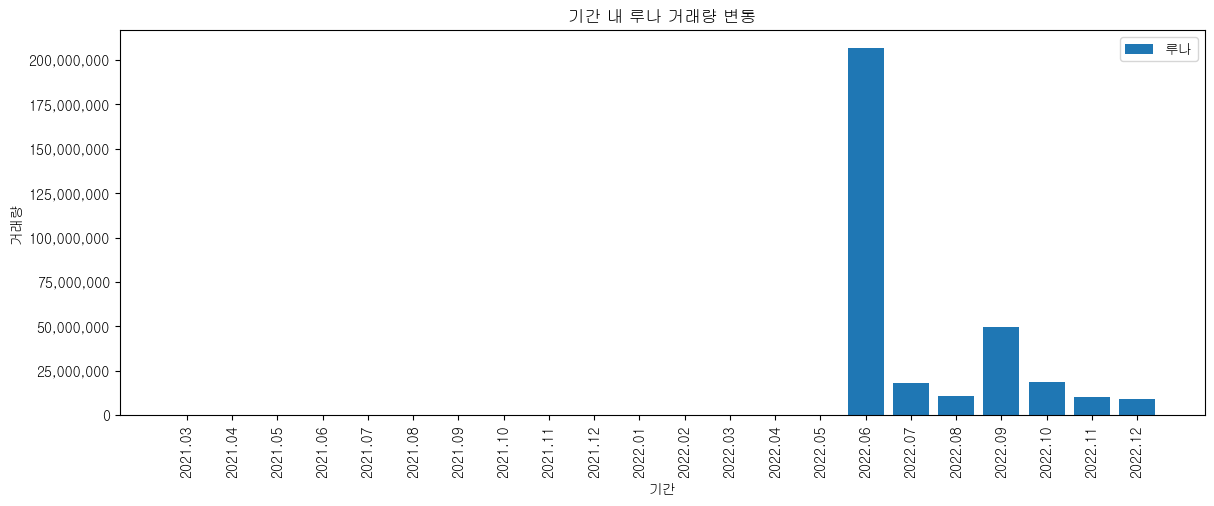

In [265]:
# 기간 내 루나 거래량 변동
plt.figure(figsize=(14,5))
xs = df_luna_volume.index.to_list()
ys = df_luna_volume['거래량'].to_list()
plt.bar(xs, ys)
plt.title('기간 내 루나 거래량 변동')
plt.xlabel('기간')
plt.ylabel('거래량')

# y축 지수 표현(e) 없애기
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

plt.xticks(rotation='vertical')

plt.legend(labels=['루나'])
plt.show()

In [ ]:
# 각 코인별 가격 변동량 및 거래량 간의 상관관계 그래프
# 우선 하나의 그래프로 표현

In [279]:
df_bit_price['종가(KRW)'].min()

15793493.364

C:\Users\Jasper\AppData\Local\Temp\ipykernel_39336\2429335490.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
C:\Users\Jasper\AppData\Local\Temp\ipykernel_39336\2429335490.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


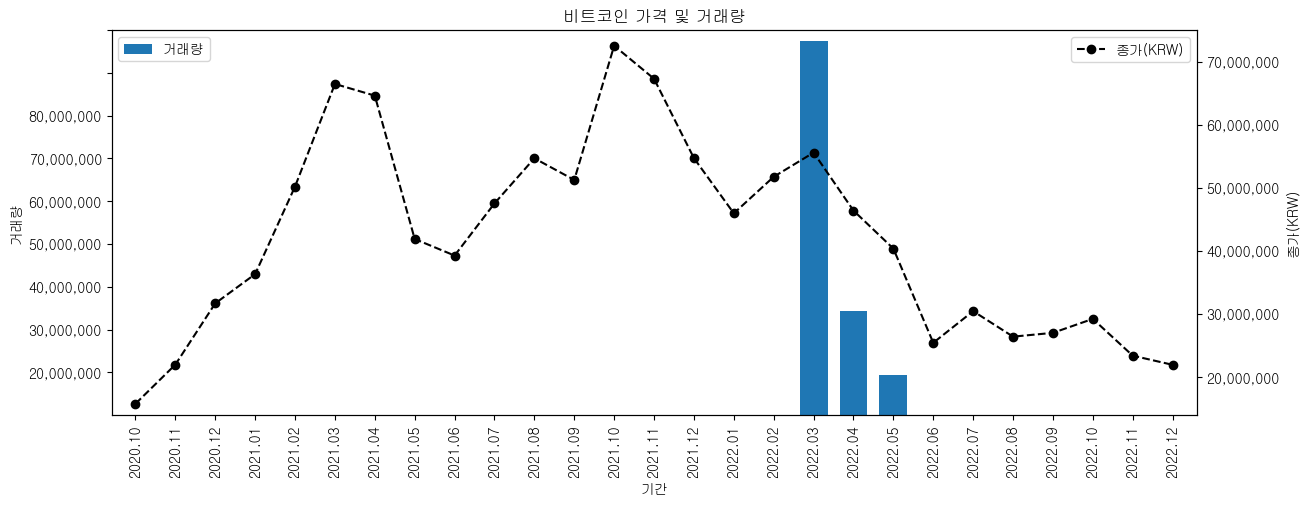

In [288]:
# 비트코인 가격 및 거래량 합친 그래프
plt.figure(figsize=(14,5))

ax1 = df_bit_volume['거래량'].plot(kind='bar', width=0.7)
ax2 = ax1.twinx()
ax2.plot(df_bit_price.index,df_bit_price['종가(KRW)'], ls='--', marker='o', color = 'black', label='종가(KRW)')
ax1.set_ylim(1500000,45000000000)
ax2.set_ylim(14000000,75000000)
ax1.set_xlabel('기간')
ax1.set_ylabel('거래량')
ax2.set_ylabel('종가(KRW)')
plt.title('비트코인 가격 및 거래량')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
# y축 지수 표현(e) 없애기
current_values = plt.gca().get_yticks()
ax1.set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
ax2.set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

plt.show()

In [356]:
df_bit = df.loc[['비트코인'], ['날짜','종가(USD)','종가(KRW)','원달러환율','거래량']]
df_eth = df.loc[['이더리움'], ['날짜','종가(USD)','종가(KRW)','원달러환율','거래량']]
df_wemix = df.loc[['위믹스'], ['날짜','종가(USD)','종가(KRW)','원달러환율','거래량']]
df_luna = df.loc[['루나'], ['날짜','종가(USD)','종가(KRW)','원달러환율','거래량']]

C:\Users\Jasper\AppData\Local\Temp\ipykernel_39336\2448129118.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
C:\Users\Jasper\AppData\Local\Temp\ipykernel_39336\2448129118.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in current_values])


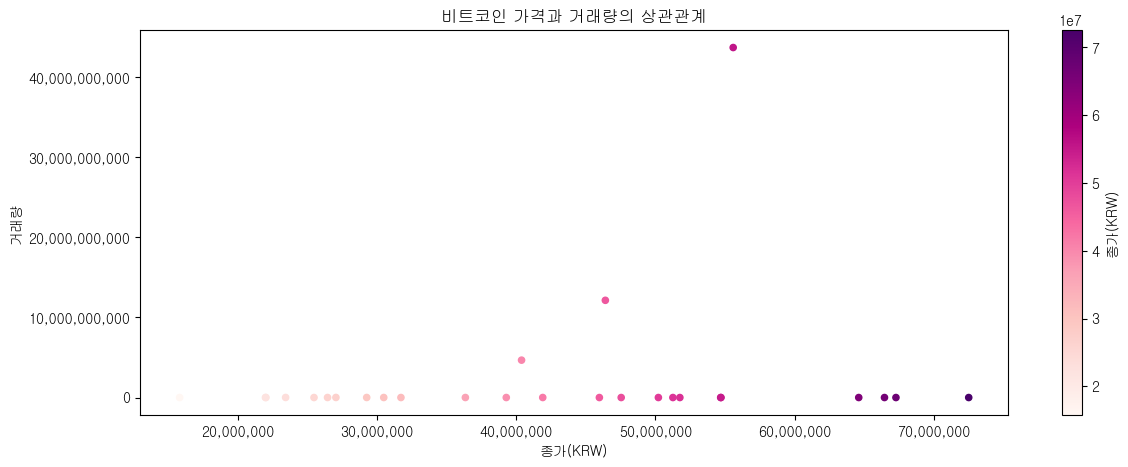

In [350]:
# 비트코인 가격과 거래량의 상관관계
plt.rcParams["figure.figsize"] = (14,5)
df_bit.plot(kind='scatter', x='종가(KRW)', y='거래량', c='종가(KRW)',cmap='RdPu')

# 단위수정
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
current_values = plt.gca().get_xticks()
plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in current_values])

plt.title('비트코인 가격과 거래량의 상관관계')
plt.show()

C:\Users\Jasper\AppData\Local\Temp\ipykernel_39336\2275668345.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
C:\Users\Jasper\AppData\Local\Temp\ipykernel_39336\2275668345.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in current_values])


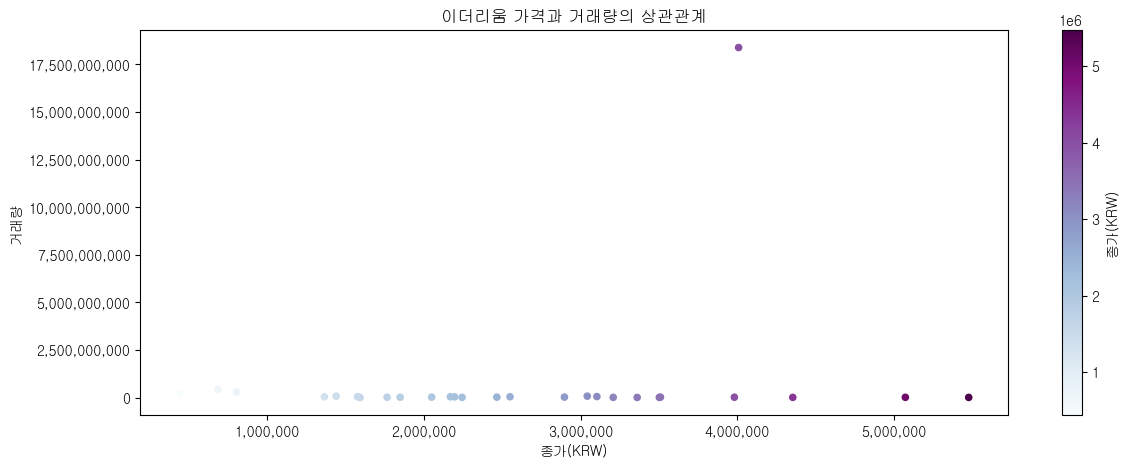

In [358]:
# 이더리움 가격과 거래량의 상관관계
plt.rcParams["figure.figsize"] = (14,5)
df_eth.plot(kind='scatter', x='종가(KRW)', y='거래량', c='종가(KRW)',cmap='BuPu')

# 단위수정
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
current_values = plt.gca().get_xticks()
plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in current_values])

plt.title('이더리움 가격과 거래량의 상관관계')
plt.show()

C:\Users\Jasper\AppData\Local\Temp\ipykernel_39336\3977880536.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
C:\Users\Jasper\AppData\Local\Temp\ipykernel_39336\3977880536.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in current_values])


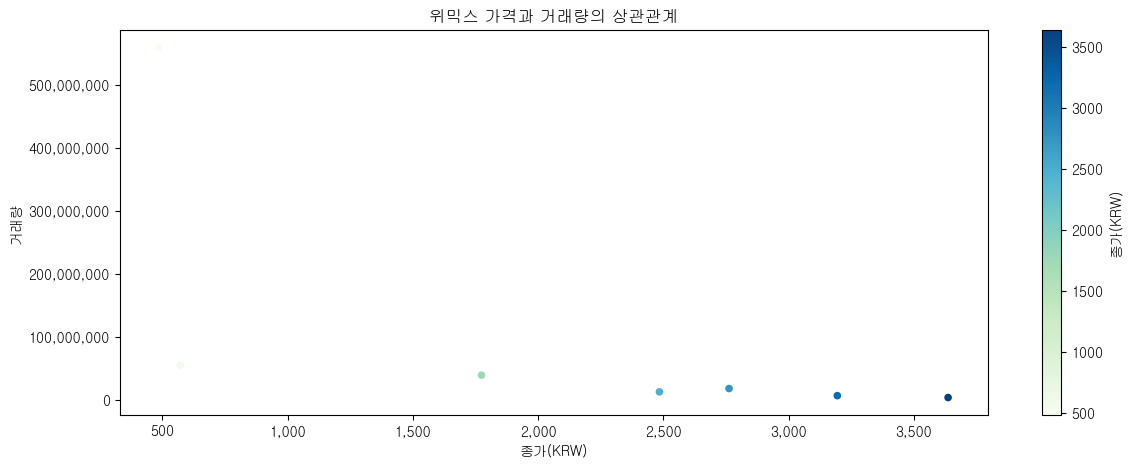

In [360]:
# 위믹스 가격과 거래량의 상관관계
plt.rcParams["figure.figsize"] = (14,5)
df_wemix.plot(kind='scatter', x='종가(KRW)', y='거래량', c='종가(KRW)',cmap='GnBu')

# 단위수정
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
current_values = plt.gca().get_xticks()
plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in current_values])

plt.title('위믹스 가격과 거래량의 상관관계')
plt.show()

C:\Users\Jasper\AppData\Local\Temp\ipykernel_39336\402281916.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
C:\Users\Jasper\AppData\Local\Temp\ipykernel_39336\402281916.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in current_values])


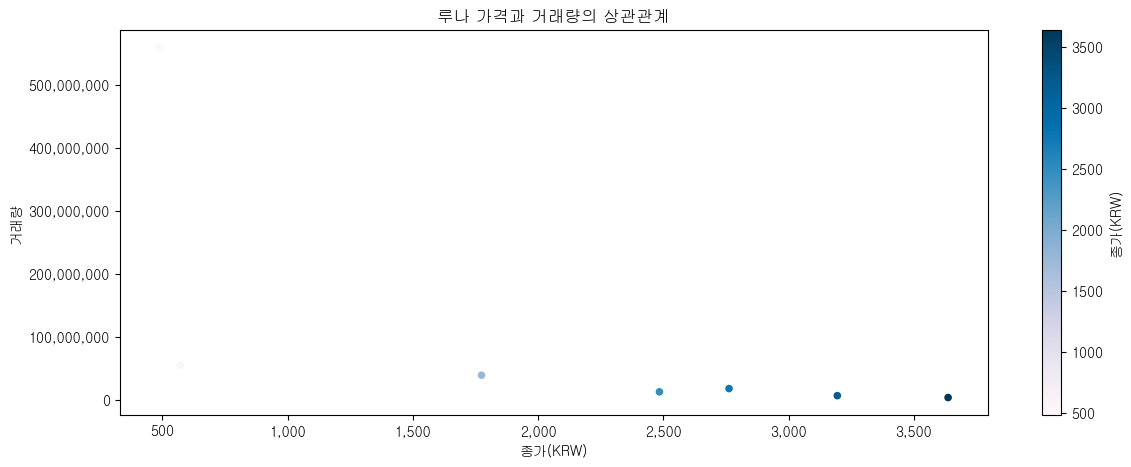

In [361]:
# 루나 가격과 거래량의 상관관계
plt.rcParams["figure.figsize"] = (14,5)
df_wemix.plot(kind='scatter', x='종가(KRW)', y='거래량', c='종가(KRW)',cmap='PuBu')

# 단위수정
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
current_values = plt.gca().get_xticks()
plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in current_values])

plt.title('루나 가격과 거래량의 상관관계')
plt.show()

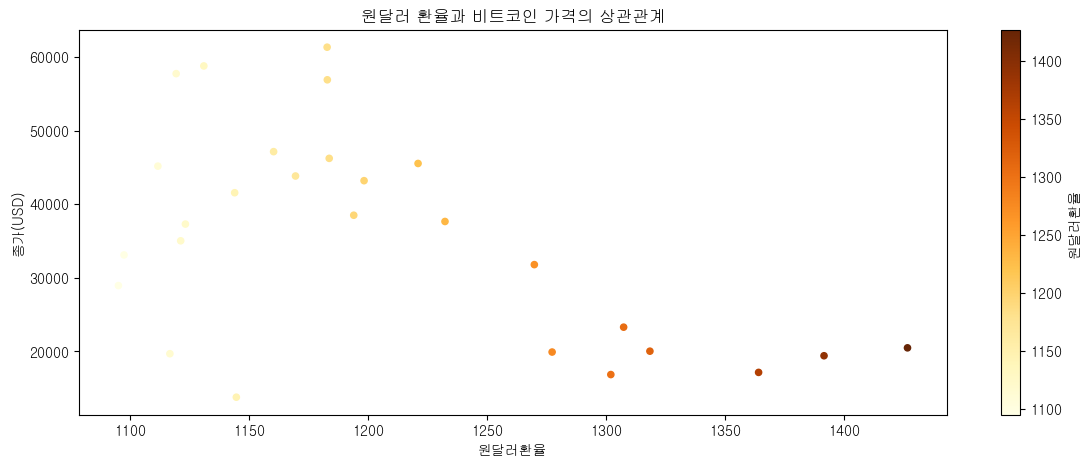

In [355]:
# 환율과 비트코인 가격의 상관관계
plt.rcParams["figure.figsize"] = (14,5)
df_bit.plot(kind='scatter', x='원달러환율', y='종가(USD)', c='원달러환율',cmap='YlOrBr')

plt.title('원달러 환율과 비트코인 가격의 상관관계')
plt.show()

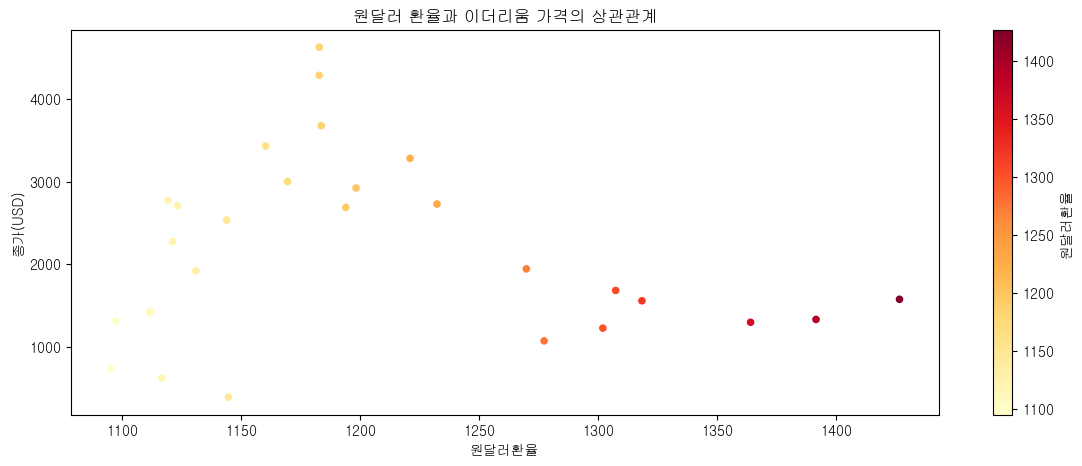

In [363]:
# 환율과 이더리움 가격의 상관관계
plt.rcParams["figure.figsize"] = (14,5)
df_eth.plot(kind='scatter', x='원달러환율', y='종가(USD)', c='원달러환율',cmap='YlOrRd')

plt.title('원달러 환율과 이더리움 가격의 상관관계')
plt.show()

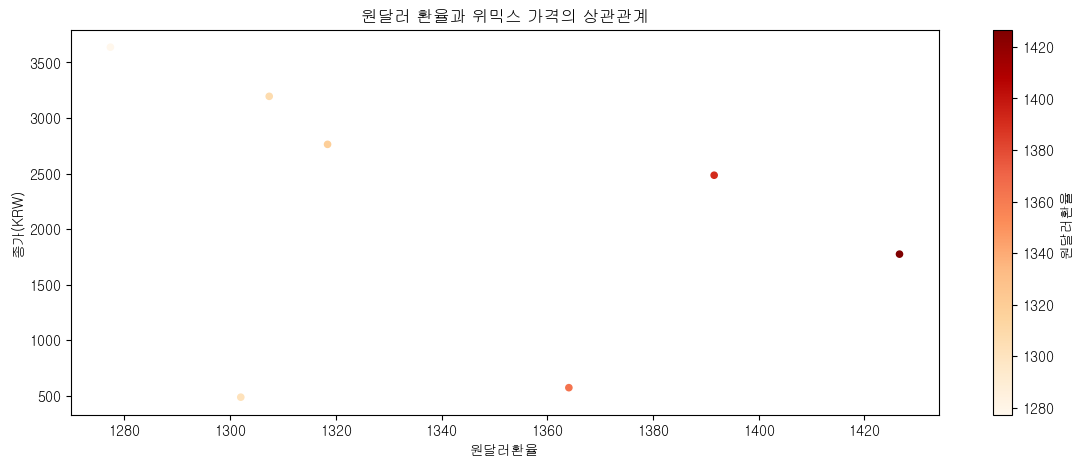

In [368]:
# 환율과 위믹스 가격의 상관관계
plt.rcParams["figure.figsize"] = (14,5)
df_wemix.plot(kind='scatter', x='원달러환율', y='종가(KRW)', c='원달러환율',cmap='OrRd')

plt.title('원달러 환율과 위믹스 가격의 상관관계')
plt.show()

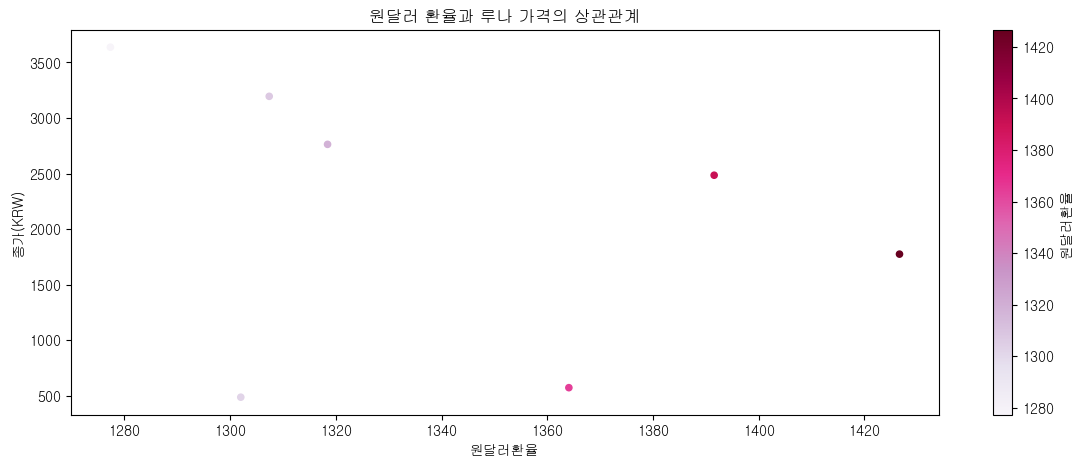

In [369]:
# 환율과 루나 가격의 상관관계
plt.rcParams["figure.figsize"] = (14,5)
df_wemix.plot(kind='scatter', x='원달러환율', y='종가(KRW)', c='원달러환율',cmap='PuRd')

plt.title('원달러 환율과 루나 가격의 상관관계')
plt.show()